<a href="https://colab.research.google.com/github/nanopiero/fusion/blob/main/notebooks/construction_pb_fusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## A Data fusion problem

In [2]:
# ! git clone https://github.com/nanopiero/fusion.git
# import os
# os.chdir('fusion')

Cloning into 'fusion'...
remote: Enumerating objects: 76, done.
remote: Counting objects: 100% (76/76), done.
remote: Compressing objects: 100% (75/75), done.
Receiving objects: 100% (76/76), 992.12 KiB | 11.40 MiB/s, done.
remote: Total 76 (delta 42), reused 4 (delta 0), pack-reused 0
Resolving deltas: 100% (42/42), done.


In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import time
import sys
sys.path.append('/home/mdso/lepetitp/ppc/WEBCAMS/src/raincell/ia/notebooks/learning/simulation')

# To generate ground truth
from fusion.utils.datasets import spatialized_gt, create_cmls_filter, FusionDataset
# To generate available inputs and targets
from fusion.utils.datasets import indices_to_sampled_values, get_point_measurements, point_gt, segment_gt, make_noisy_images
# To visualize
from torch.utils.data import DataLoader
from fusion.utils.viz import set_tensor_values2, plot_images, plot_images_10pts_20seg, plot_results_10pts_20seg

In [28]:
S = 64
# in the dataset :
image = spatialized_gt(ndiscs=5, size=S, nsteps=60)
pairs, filter = create_cmls_filter(S, npairs = 10)

In [29]:
device = torch.device('cpu')
images = torch.tensor(image).unsqueeze(0).float().to(device)
pairs = torch.tensor(pairs).unsqueeze(0).float().to(device)
filters = torch.tensor(filter).unsqueeze(0).float().to(device)

# done on gpu:
point_measurements, _,  _ = point_gt(images, npoints=5)
segment_measurements, _ = segment_gt(images, pairs, filters)

images2 = make_noisy_images(images)

In [30]:
images = set_tensor_values2(images, point_measurements)

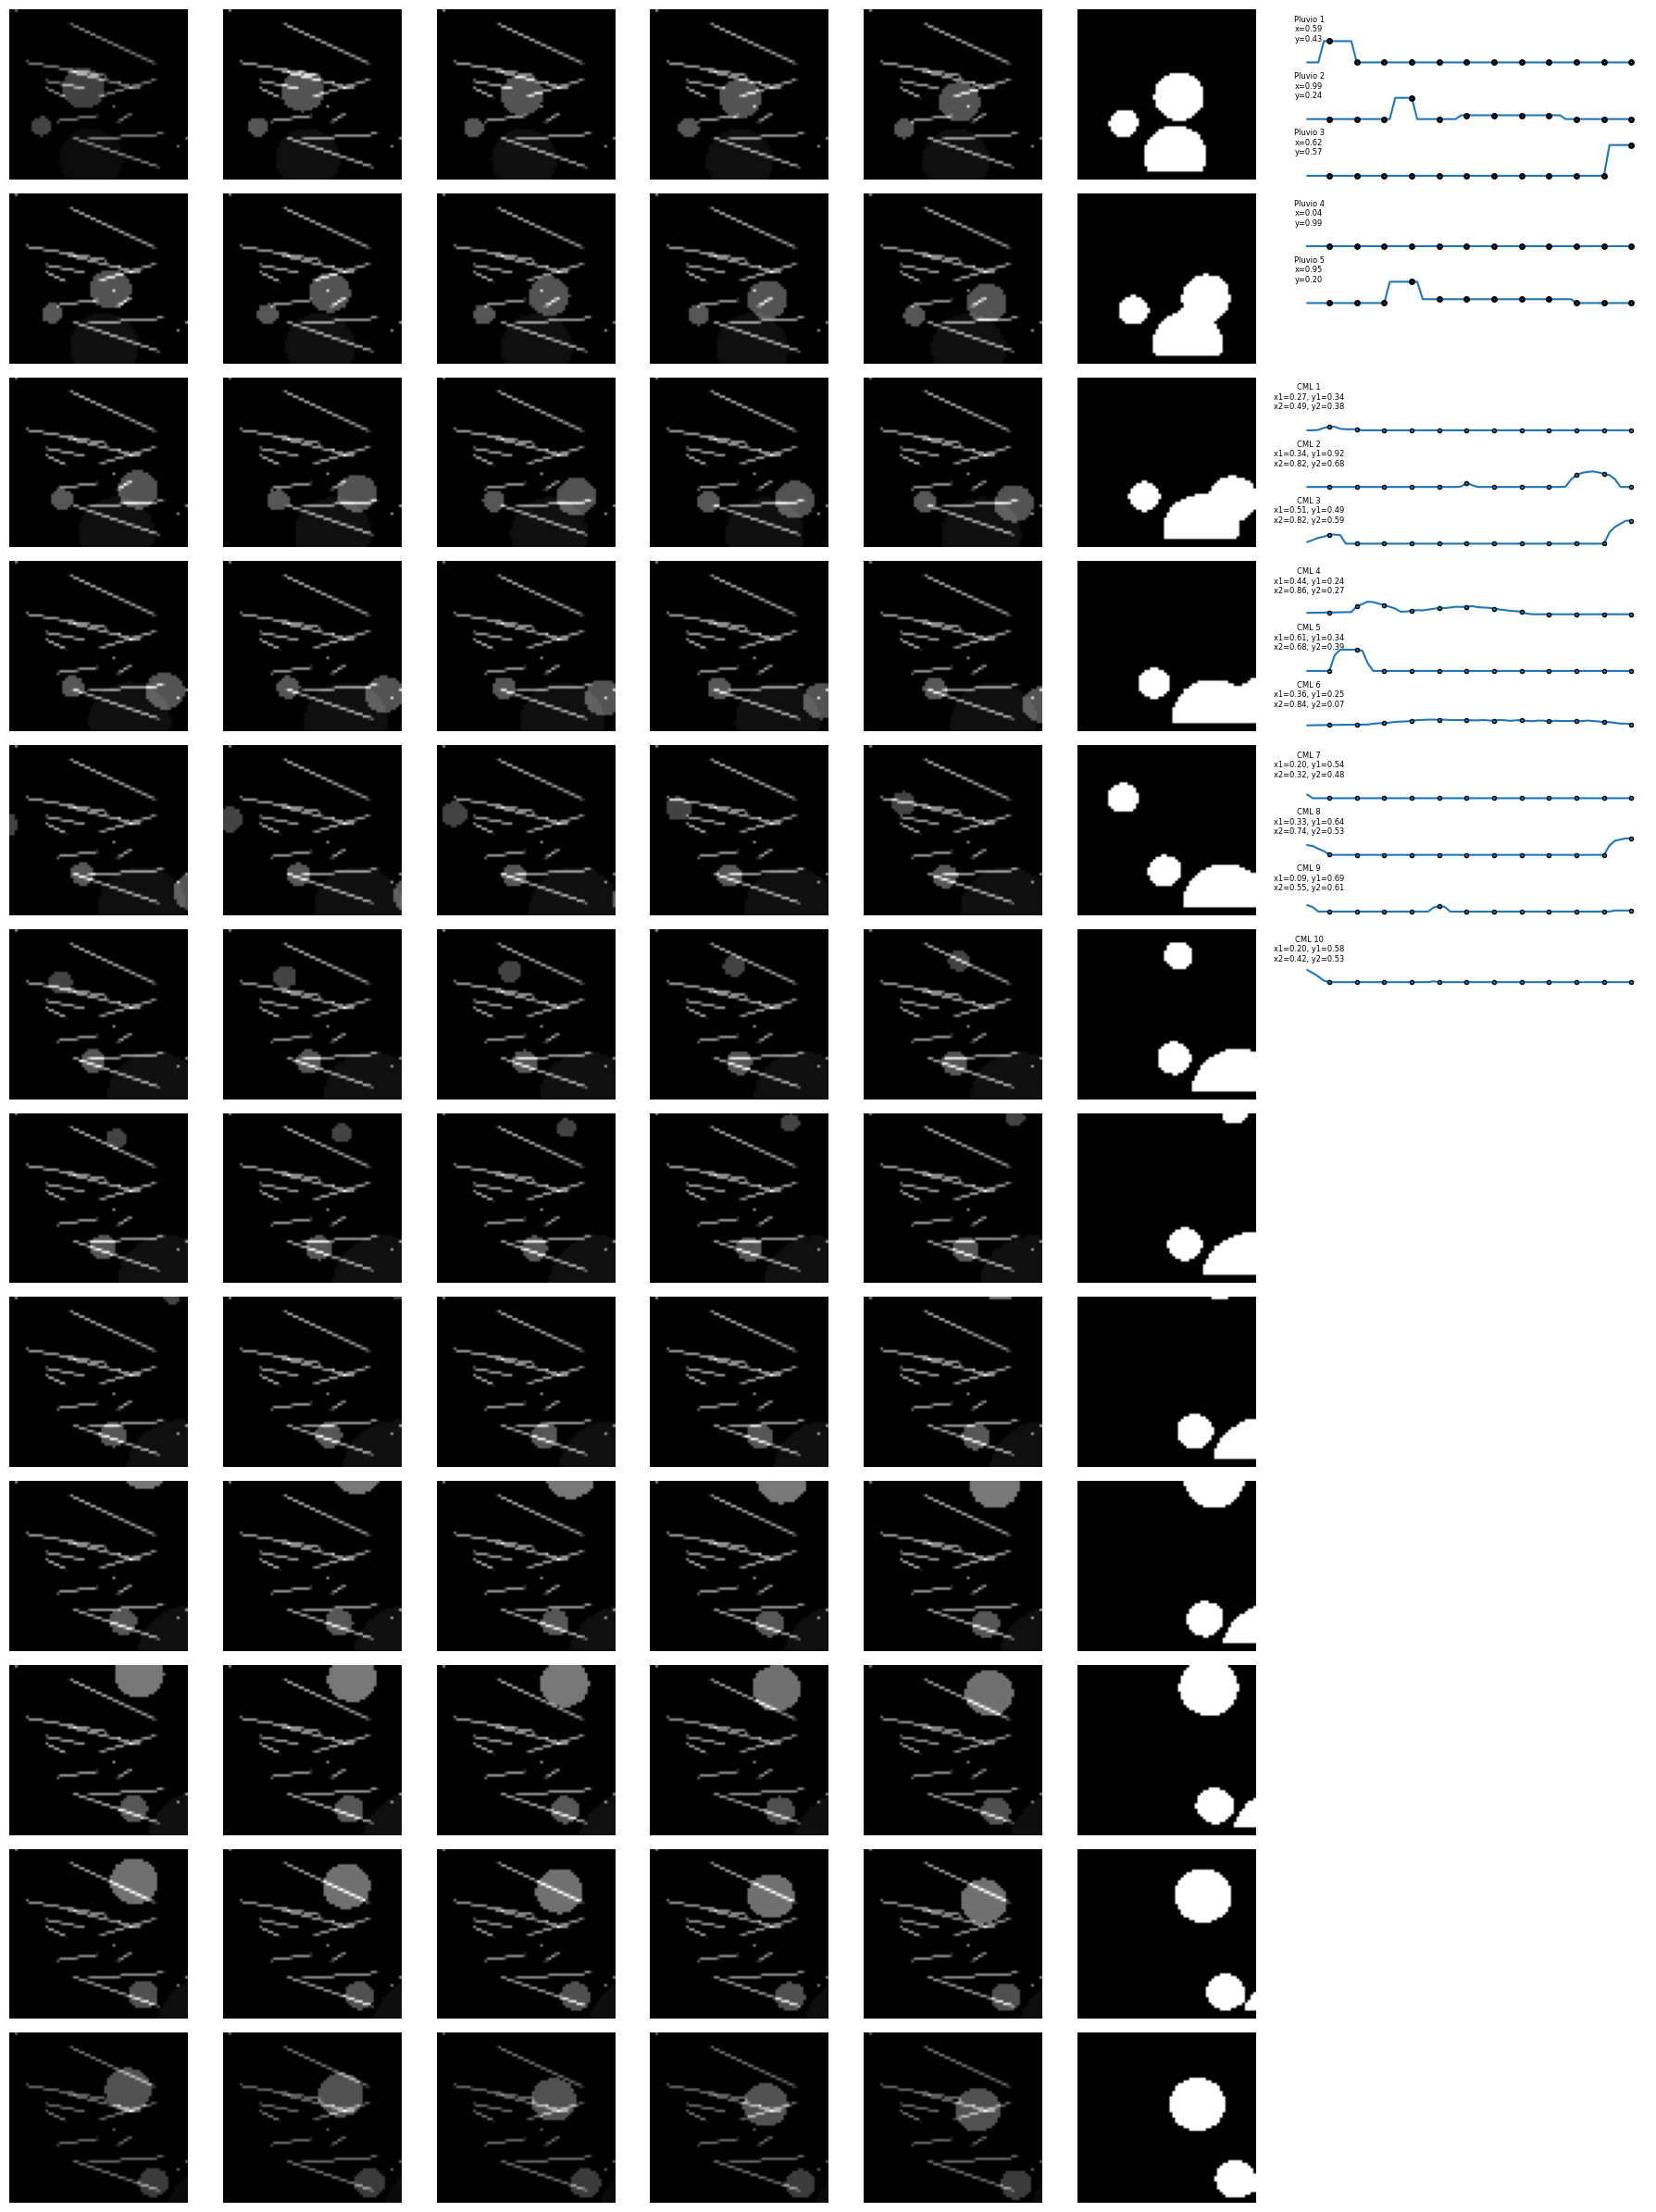

In [31]:
# Exemple / tracés
images = set_tensor_values2(images, point_measurements)
plot_images(images.cpu().numpy().squeeze(0) + filter.sum(axis=0),
            images2.squeeze(0).cpu().numpy(),
            point_measurements.cpu().numpy().squeeze(0),
            segment_measurements.cpu().numpy().squeeze(0))


# ground truth : 5 first columns (spatialized RR1 - 60 min)
# available data : two last columns ("radar" (noisy mask each 5 min) + rain gauges + perfect CML measurements) 